In [35]:
import numpy as np
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_graph, svg_bigraph
import geopandas as gpd
import pandas as pd
from sklearn.metrics import silhouette_score

In [2]:
adj = np.loadtxt("GCC-part/adjacency_matrix.txt", comments="#", delimiter=" ", unpack=False)

In [3]:
adj

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [21]:
louvain = Louvain(n_aggregations=10)
labels = louvain.fit_transform(adj)

In [22]:
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [124 114 108  92  91  87  78  77  76  76  61  58  56  48  48  36  34  34
  33  24  18  17]


In [23]:
len(labels)

1390

In [26]:
get_modularity(adj, labels)

0.8715686934329964

In [10]:
geo = gpd.read_file("joined_data/WIct.shp")

In [27]:
simple = geo[["ct","geometry"]].copy()

Index(['ct', 'male', 'female', 'Total_x', '.50', '.50-.99', '1.00-1.24',
       '1.25-1.49', '1.50-1.84', '1.85-1.99',
       ...
       'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'geometry', 'labels'],
      dtype='object', length=108)

In [24]:
simple["labels"] = labels

<AxesSubplot:>

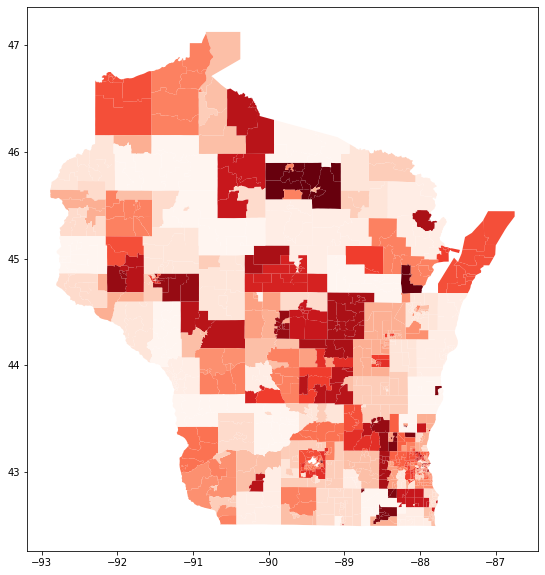

In [25]:
simple.plot(column="labels",cmapfigsize=(10,10))

In [29]:
df = pd.read_csv("joined_data/joined_data_CHR_simplified.csv")

In [32]:
sub = df[['poverty_score', 'median_age_no_insurance', 'hispanic_prop',
       'MFratio', 'household_median_income', 'white', 'black', 'native',
       'asian', 'hawaiian', 'Bachelor', 'Master', 'Doctorate', 'pop']]

In [37]:
attr = np.array(sub)

In [38]:
attr

array([[5.43144000e+03, 3.75000000e+01, 4.08858603e-03, ...,
        1.46000000e+02, 2.40000000e+01, 2.93500000e+03],
       [2.30987000e+03, 3.63829787e+01, 1.78704393e-02, ...,
        3.00000000e+01, 0.00000000e+00, 1.34300000e+03],
       [4.33765000e+03, 3.99230769e+01, 2.78961643e-02, ...,
        5.80000000e+01, 3.00000000e+00, 2.58100000e+03],
       ...,
       [1.11261100e+04, 3.03876404e+01, 6.85753472e-03, ...,
        3.24000000e+02, 6.40000000e+01, 5.83300000e+03],
       [8.85504000e+03, 4.12140411e+01, 0.00000000e+00, ...,
        1.60000000e+02, 0.00000000e+00, 5.04200000e+03],
       [7.24562000e+03, 3.16646778e+01, 2.86539316e-02, ...,
        1.75000000e+02, 1.20000000e+01, 4.50200000e+03]])

In [39]:
silhouette_score(attr, labels)

-0.23801604586074807